In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all fil

In [194]:
sub=pd.read_csv("sample_submission.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [195]:
print(sub.head(3))



   video_id  likes
0     87185      0
1      9431      0
2     40599      0


In [196]:
train.head(3)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0


In [197]:
test.head(4)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA
3,494,Measuring RPM with a spectrum analyzer mobile app,Matthias Wandel,26.0,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",89664.0,145.0,324.0,Using a spectrum analyzer app to analyze the s...,US


In [198]:
ID_COL,TARGET_COL='video_id', 'likes'

In [199]:
print(f"\nTrain contain number of samples {train.shape[0]} and variable is {train.shape[1]}")
print(f"\ntest contain number of samples {test.shape[0]} and variable is {test.shape[1]}")
print(f"\nsub contain number of samples {sub.shape[0]} and variable is {sub.shape[1]}")
features= [c for c in train.columns if c not in [ID_COL,TARGET_COL]]
print(f"\ntotal number of features is {len(features)} features")


Train contain number of samples 26061 and variable is 12

test contain number of samples 11170 and variable is 11

sub contain number of samples 11170 and variable is 2

total number of features is 10 features


In [200]:
train[TARGET_COL].value_counts(normalize=True)

10.0       0.001305
17.0       0.001228
18.0       0.001074
14.0       0.001036
11.0       0.000998
             ...   
18556.0    0.000038
22107.0    0.000038
18989.0    0.000038
8625.0     0.000038
33785.0    0.000038
Name: likes, Length: 12134, dtype: float64

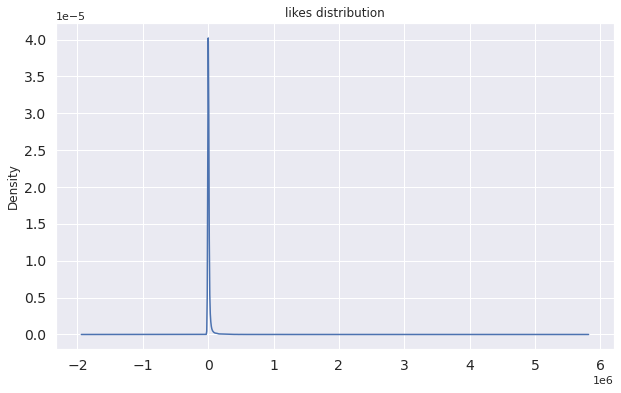

In [201]:
train[TARGET_COL].plot(kind="density",title="likes distribution",fontsize=14,figsize=(10,6))

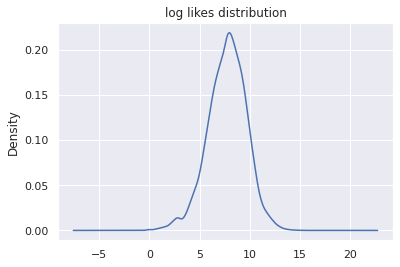

In [202]:
pd.Series(np.log1p(train[TARGET_COL])).plot(kind='density',title="log likes distribution")

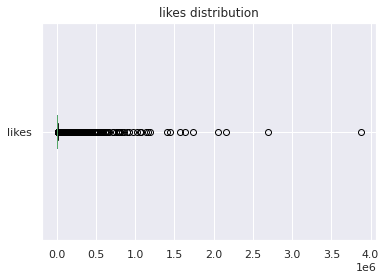

In [203]:
train[TARGET_COL].plot(kind="box",vert=False,title="likes distribution")

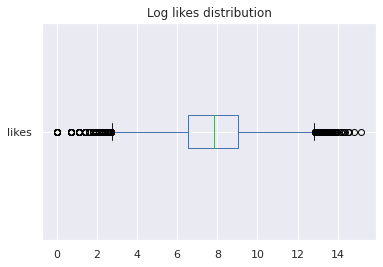

In [204]:
pd.Series(np.log1p(train[TARGET_COL])).plot(kind='box',vert=False,title="Log likes distribution")

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [206]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

In [207]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [208]:
num_var=['views','dislikes','comment_count']

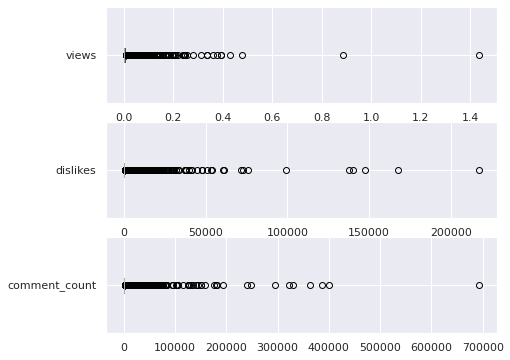

In [209]:
#univariate analysis
fig,axes=plt.subplots(3,1,figsize=(7,6))
for i,c in enumerate (num_var):
    train[[c]].boxplot(ax=axes[i],vert=False)
    

In [210]:
#transforming  into log 

for c in num_var+['likes']:
    train[c]=np.log1p(train[c])

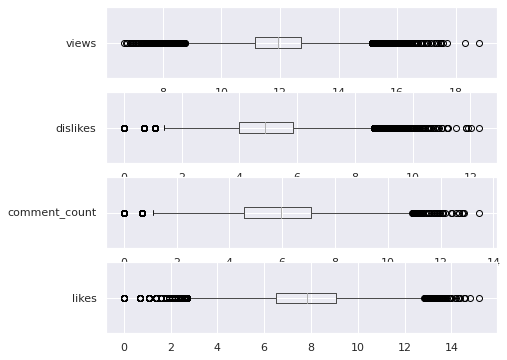

In [211]:
fig,axes=plt.subplots(4,1,figsize=(7,6))
for i,c in enumerate(num_var+['likes']):
    train[[c]].boxplot(ax=axes[i],vert=False)

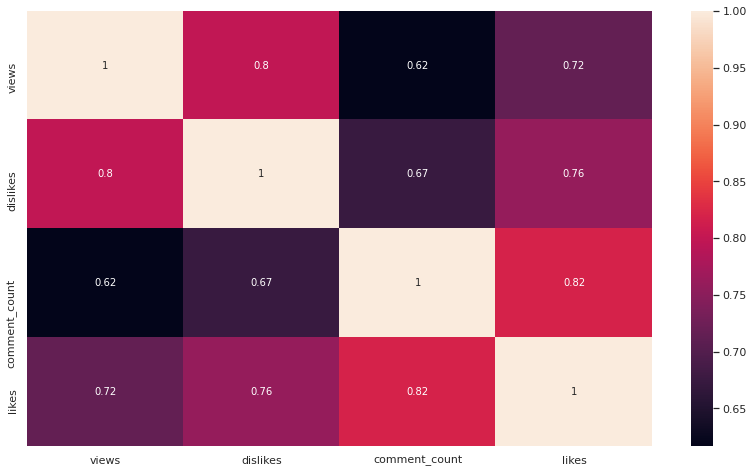

In [212]:
#Bivariate Analysis

plt.figure(figsize=(14,8))
sns.heatmap(train[num_var+['likes']].corr(),annot=True)

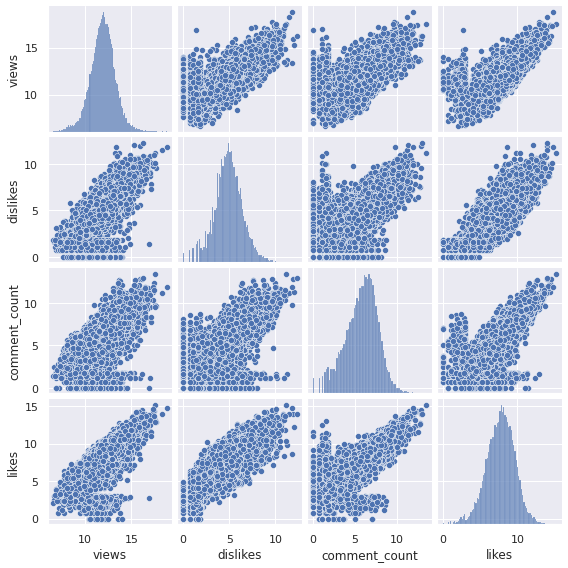

In [213]:
sns.pairplot(train[num_var+['likes']],height=2)

In [214]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [215]:
cat_var=['category_id','country_code','channel_title']

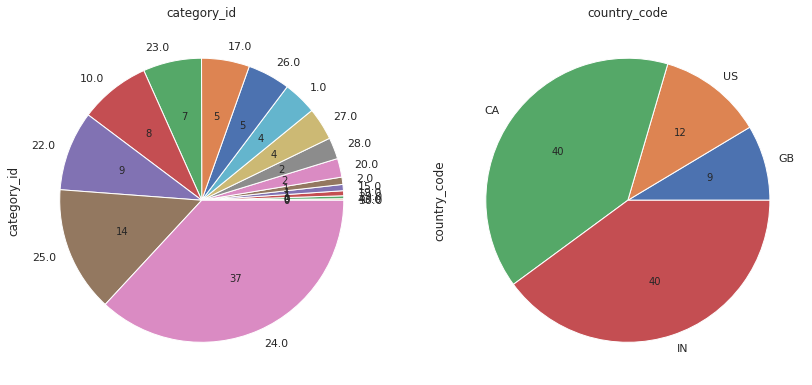

In [216]:
fig,axes=plt.subplots(1,2,figsize=(14,10))
for i,c in enumerate(['category_id','country_code']):
    train[c].value_counts()[::-1].plot(kind='pie',ax=axes[i],title=c,autopct="%.0f")
    


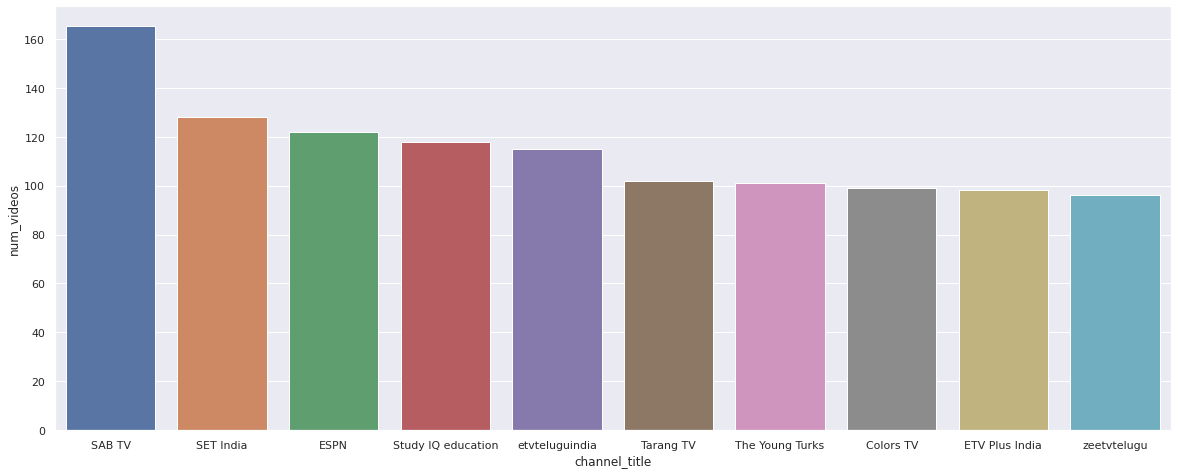

In [217]:
sns.set(rc={'figure.figsize':(20,7.8)})
top10_channels=train['channel_title'].value_counts()[:10].reset_index()
top10_channels.columns=['channel_title','num_videos']

sns.barplot(data=top10_channels,x='channel_title',y='num_videos')

In [218]:

country_wise=train.groupby(['country_code','channel_title'])['likes'].max().reset_index()




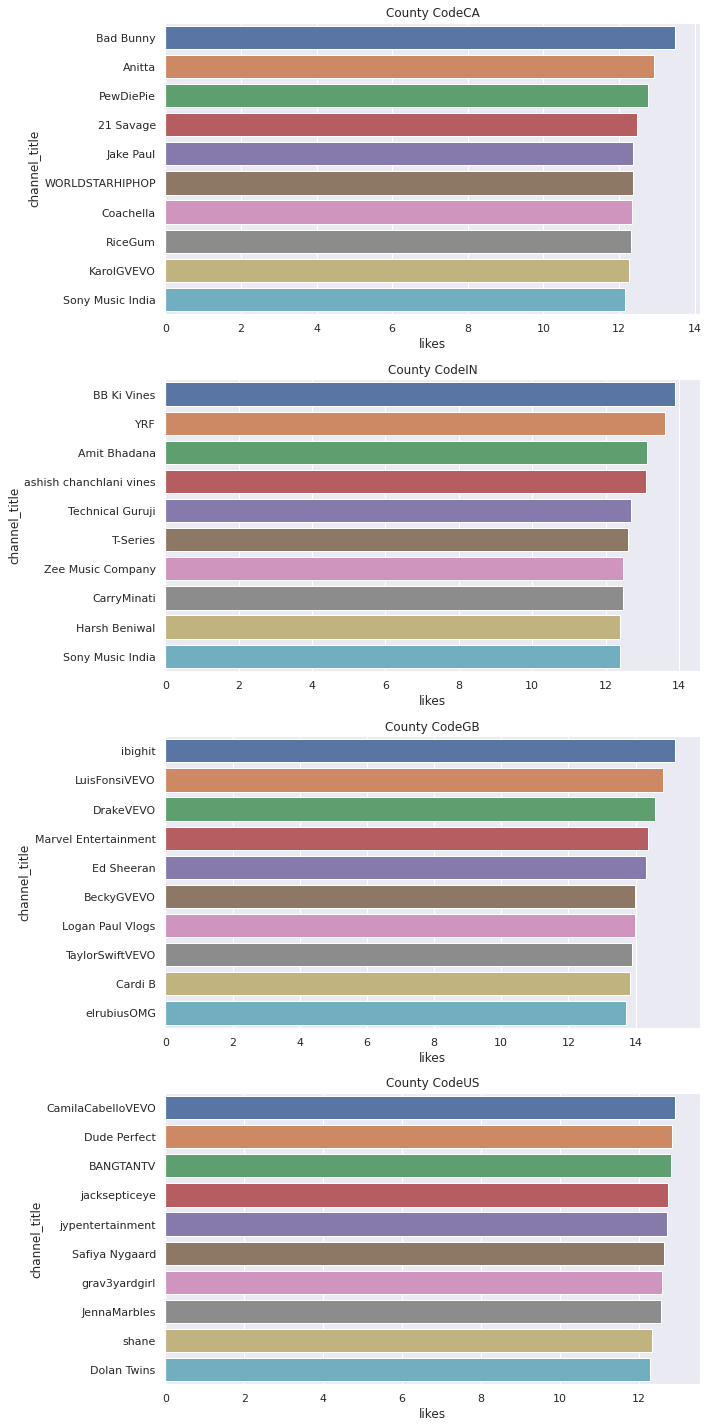

In [219]:
country_wise=country_wise.sort_values(by=['likes'],ascending=False)

fig,axes=plt.subplots(4,1,figsize=(10,20))

for i,c in enumerate(train['country_code'].unique()):
    country=country_wise[country_wise['country_code'] == c][:10]
    _=sns.barplot(data=country,x='likes',y='channel_title',ax=axes[i])
    _=axes[i].set_title(f'County Code{c}')
plt.tight_layout()

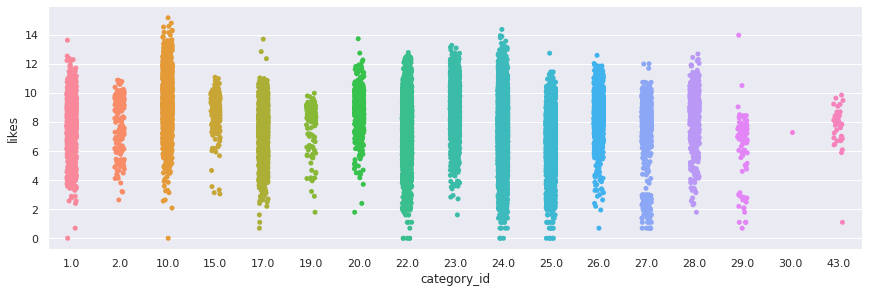

In [220]:
sns.catplot(x='category_id',y='likes',data=train,height=4,aspect=24/8)

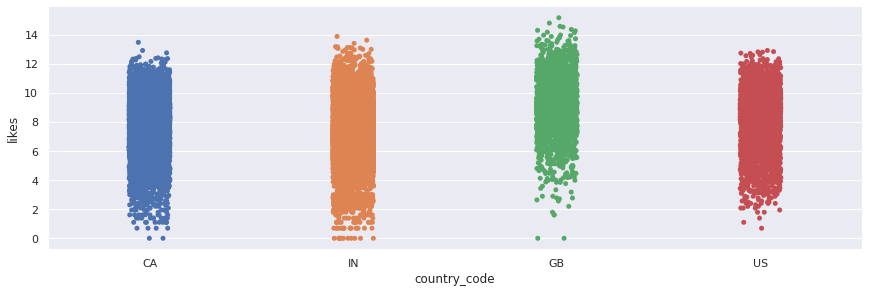

In [221]:
sns.catplot(x='country_code',y='likes',data=train,height=4,aspect=24/8)

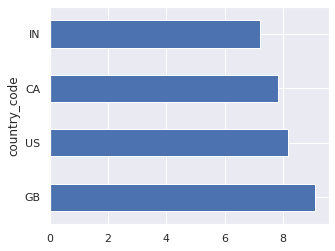

In [222]:
train.groupby(['country_code'])['likes'].mean().sort_values(ascending=False).plot(kind='barh',figsize=(5,4))

In [223]:
train['publish_date']=pd.to_datetime(train['publish_date'],format='%Y-%m-%d')
test['publish_date']=pd.to_datetime(test['publish_date'],format='%Y-%m-%d')
train['publish_date']

0       2017-12-12
1       2018-03-08
2       2018-03-26
3       2018-02-21
4       2018-05-10
           ...    
26056   2018-01-16
26057   2017-12-17
26058   2018-03-04
26059   2018-05-17
26060   2018-01-16
Name: publish_date, Length: 26061, dtype: datetime64[ns]

In [224]:
train['publish_date'].min(),train['publish_date'].max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [225]:
train['publish_date'].dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

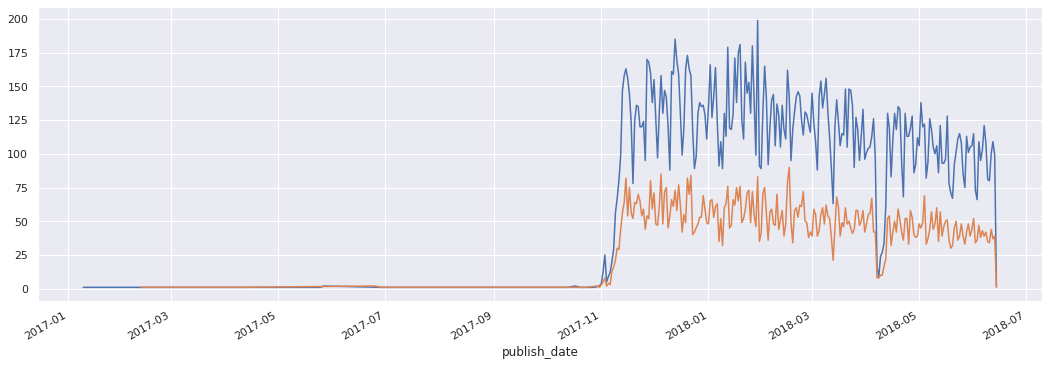

In [226]:
latest__data_train=train[train['publish_date']>'2017']
latest__data_test=test[test['publish_date']>'2017']
latest__data_train.sort_values(by='publish_date').groupby('publish_date').size().plot(figsize=(18,6))
latest__data_test.sort_values(by='publish_date').groupby('publish_date').size().plot(figsize=(18,6))


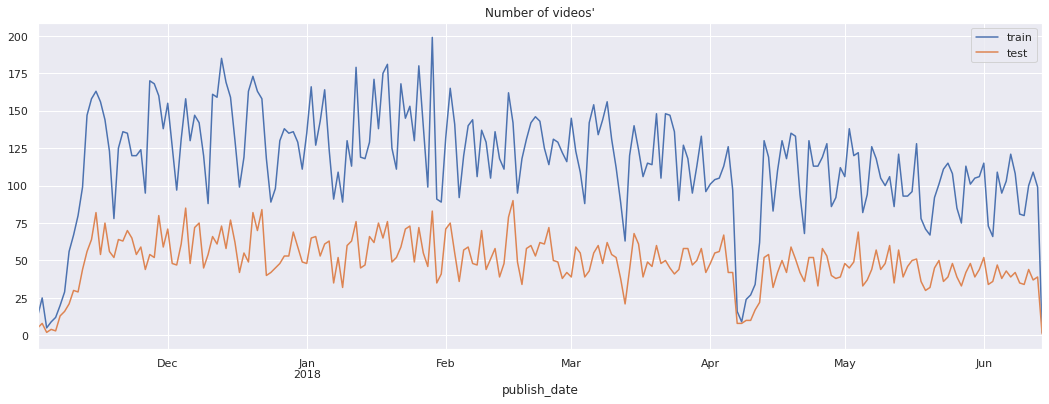

In [227]:
latest__data_train=train[train['publish_date']>'2017-11']
latest__data_test=test[test['publish_date']>'2017-11']
latest__data_train.sort_values(by='publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18,6),title="Number of videos")
latest__data_test.sort_values(by='publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18,6),title="Number of videos'")
plt.legend()

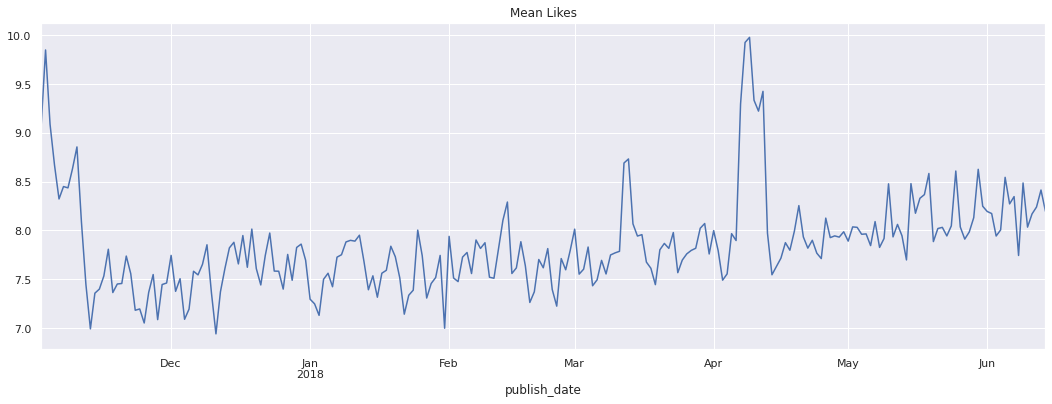

In [228]:
latest__data=train[train['publish_date']>'2017-11']
latest__data.sort_values(by='publish_date').groupby(by='publish_date')['likes'].mean().plot(figsize=(18,6),title="Mean Likes")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efca66397f0>,
      dtype=object)

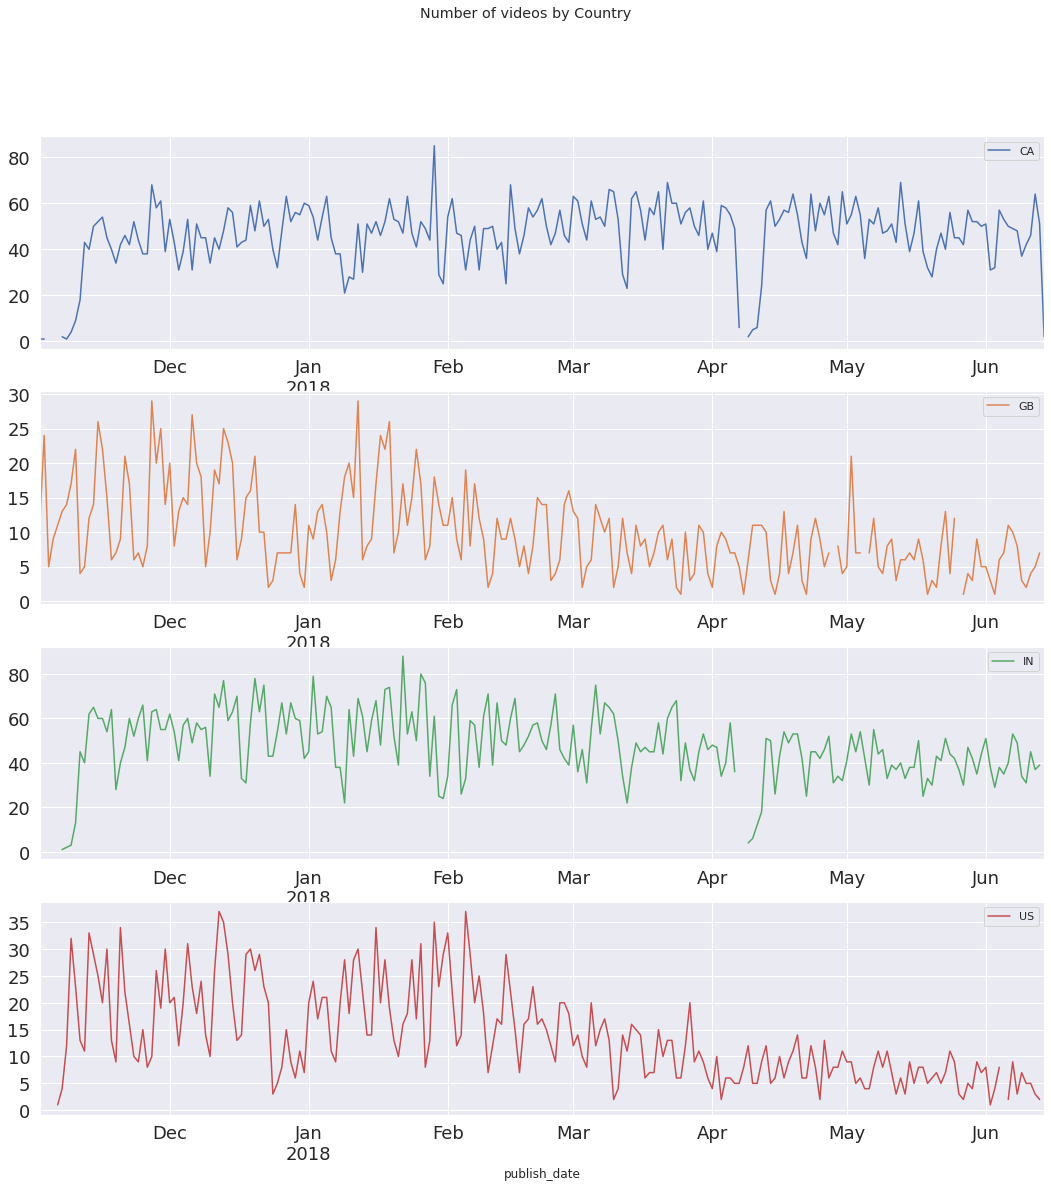

In [229]:
tmp=latest__data.groupby(['publish_date','country_code']).size().reset_index()
tmp.pivot_table(index='publish_date',columns='country_code',values=0).plot( subplots=True,figsize=(18,18),
                                                                          title="Number of videos by Country",
                                                                           sharex=False,
                                                                          fontsize=18)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efca5deecc0>,
      dtype=object)

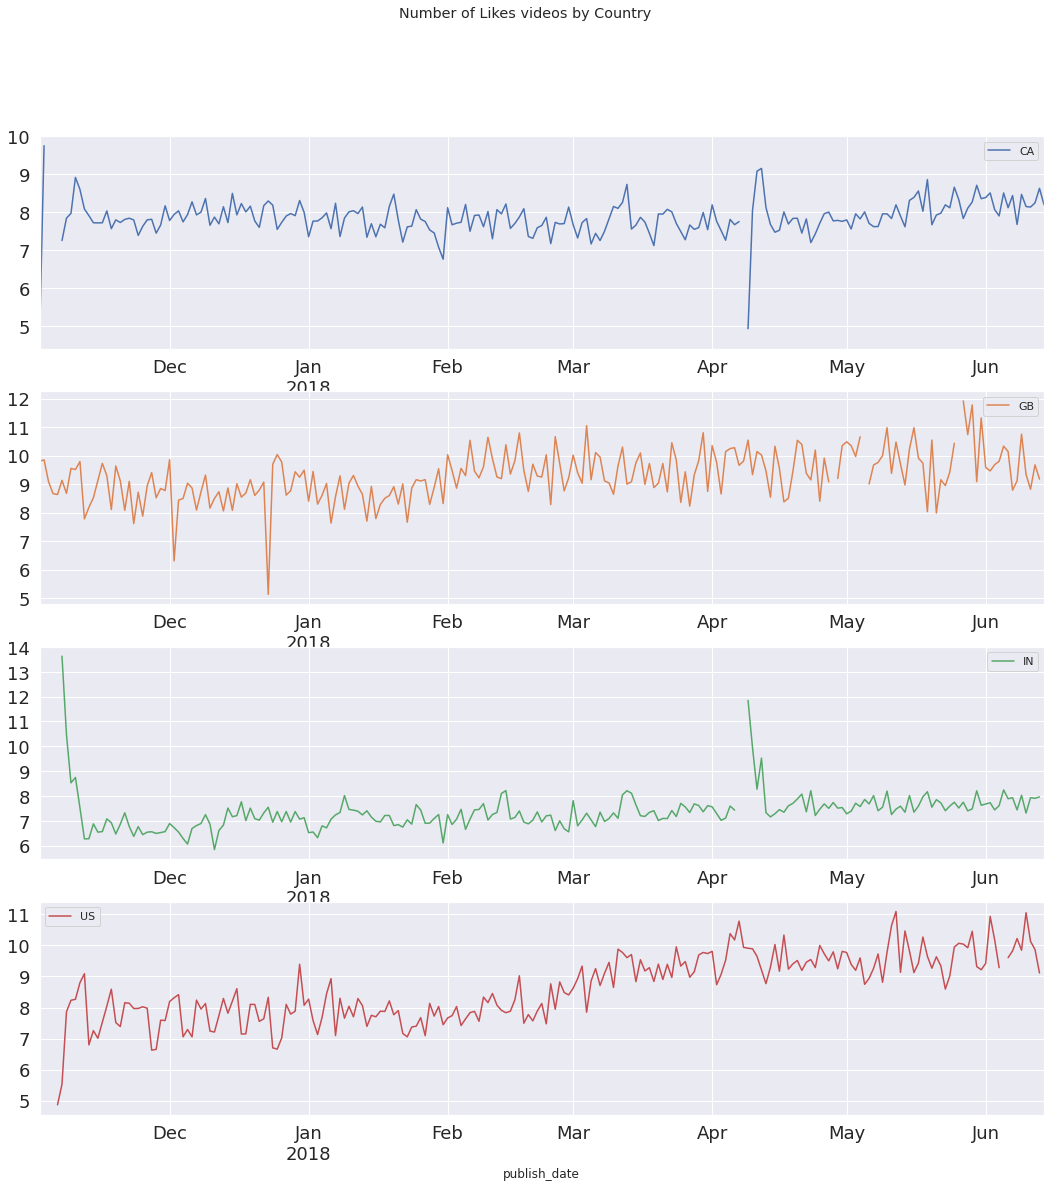

In [230]:
tmp=latest__data.groupby(['publish_date','country_code'])['likes'].mean().reset_index()
tmp.pivot_table(index='publish_date',columns='country_code',values='likes').plot( subplots=True,figsize=(18,18),
                                                                          title="Number of Likes videos by Country",
                                                                           sharex=False,
                                                                          fontsize=18)

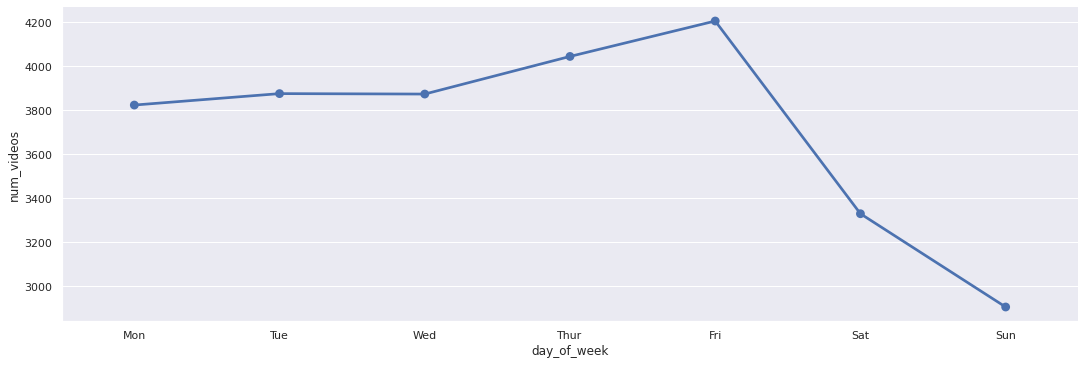

In [231]:
train['dayofweek']=train['publish_date'].dt.dayofweek
n_videos_dayofweek=train['dayofweek'].value_counts().sort_index().reset_index()
n_videos_dayofweek.columns=['day_of_week','num_videos']
n_videos_dayofweek['day_of_week']=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
sns.catplot(x='day_of_week',y='num_videos',data=n_videos_dayofweek,kind='point',aspect=24/8)

In [232]:
text_data=['title','tags','description']

In [233]:
from wordcloud import WordCloud,STOPWORDS


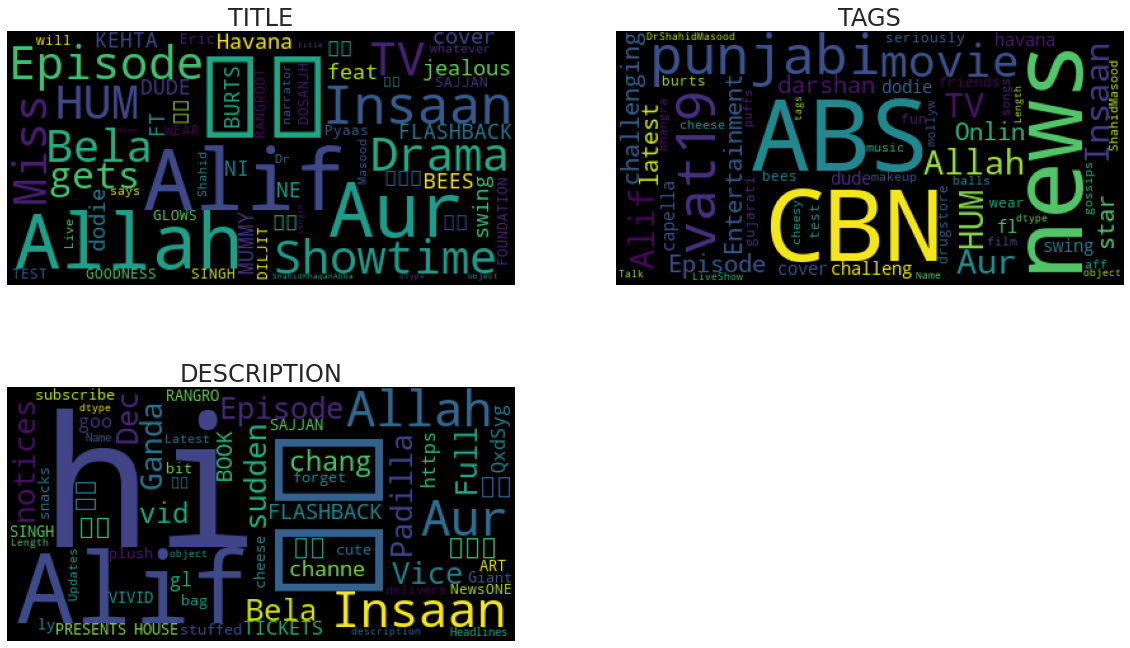

In [234]:
wc=WordCloud(stopwords=set(list(STOPWORDS)+['|']),random_state=42)
fig,axes=plt.subplots(2,2,figsize=(20,12))

axes=[s for x in axes for s in x]

for i ,c in enumerate(text_data):
   output=wc.generate(str(train[c]))
   axes[i].imshow(output)
   axes[i].set_title(c.upper(),fontsize=24)
   axes[i].axis('off')



fig.delaxes(axes[3])

In [235]:
train['likes'].describe()

count    26061.000000
mean         7.739954
std          1.927899
min          0.000000
25%          6.527958
50%          7.840706
75%          9.054154
max         15.171369
Name: likes, dtype: float64

In [236]:
100*(train['likes']>10).sum()/train.shape[0]

10.694140669966616

In [237]:
def country_wise(country_code ='IN'):
  country=train[train['country_code']==country_code]
  country=country[country['likes'] > 10]
  fig,axes=plt.subplots(2,2,figsize=(20,12))
  axes=[s for x in axes for s in x ]

  for i,c in enumerate(text_data):
    output=wc.generate(str(country[c]))
    axes[i].imshow(output)
    axes[i].set_title(c.upper(),fontsize=24)
    axes[i].axis('off')

    
  fig.delaxes(axes[3])
  _=plt.subplots(f"country_code {country_code}")
  

TypeError: ignored

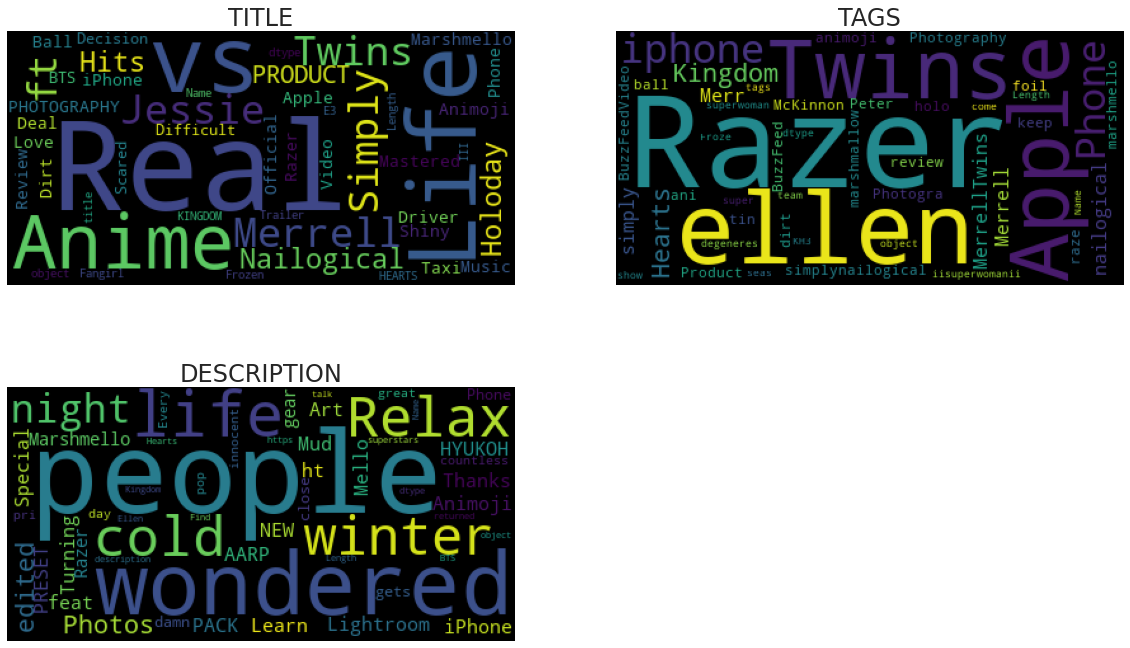

<Figure size 1440x561.6 with 0 Axes>

In [238]:
country_wise("US")

TypeError: ignored

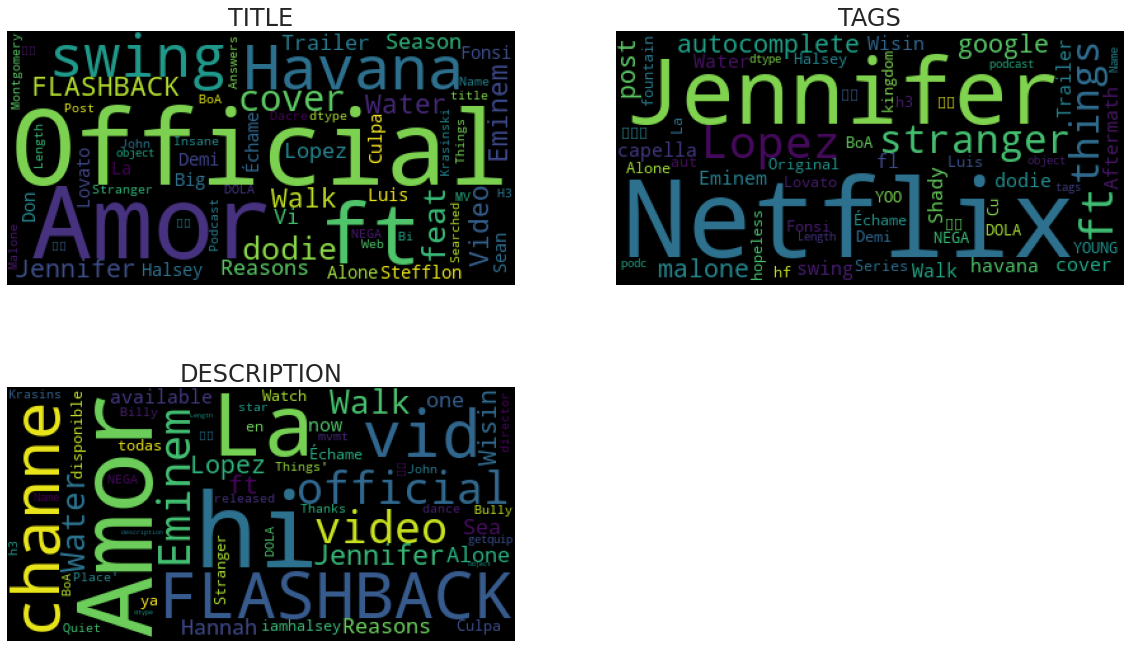

<Figure size 1440x561.6 with 0 Axes>

In [239]:
country_wise('GB')

TypeError: ignored

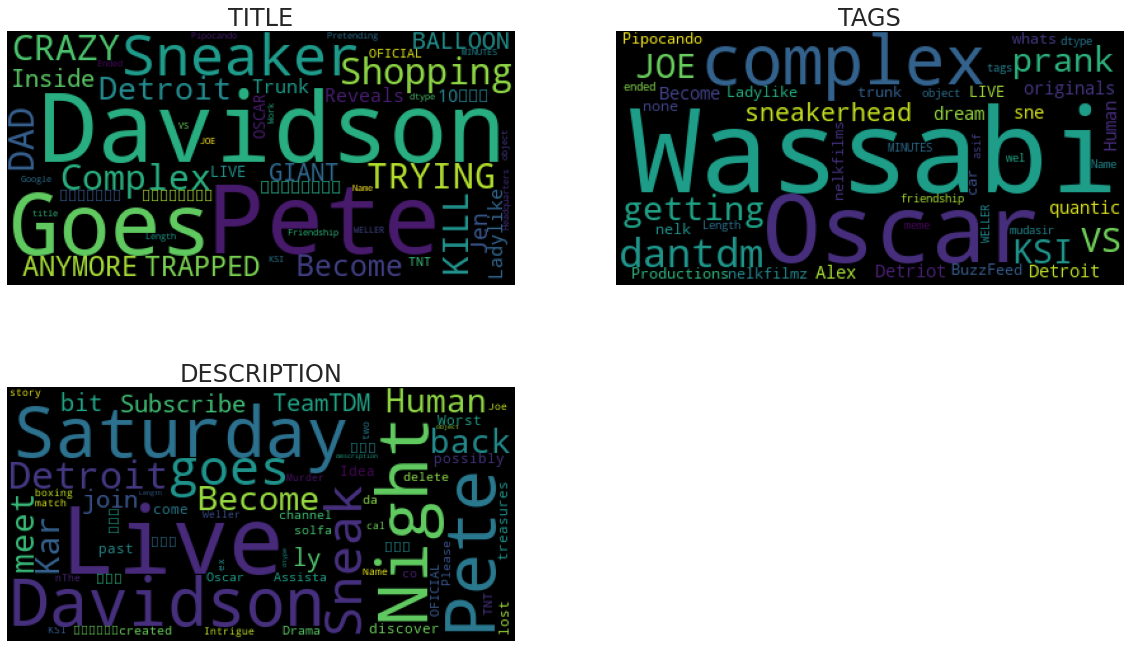

<Figure size 1440x561.6 with 0 Axes>

In [240]:
country_wise('CA')

In [241]:
train['title_len']=train['title'].apply(lambda x:len(x))
train['tags_len']=train['tags'].apply(lambda x:len(x))
train['description_len']=train['description'].apply(lambda x:len(x))
train['channel_title_len']=train['channel_title'].apply(lambda x:len(x))

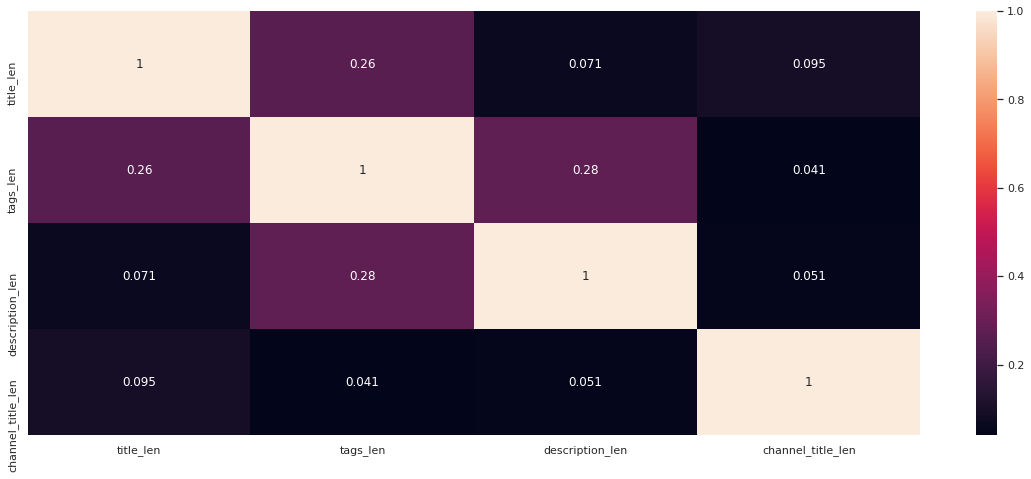

In [242]:
sns.heatmap(train[['title_len','tags_len','description_len','channel_title_len']].corr(),annot=True)

In [243]:
sub.head()

,video_id,likes
0,87185,0
1,9431,0
2,40599,0
3,494,0
4,73942,0


In [256]:
def downlaod_pred(pred_test,file_name="hacklive_sub.csv"):
  sub[TARGET_COL]=pred_test
  sub.to_csv(file_name,index=False)


  from google.colab import files
  files.download(file_name)


In [245]:
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")


train[num_var+['likes']]=train[num_var+['likes']].apply(lambda x: np.log1p(x))
test[num_var]=test[num_var].apply(lambda x: np.log1p(x))

In [246]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error

def rms(y_true,y_pred):
  return 1000*np.sqrt(mean_squared_log_error(y_true,y_pred))


def av_metric(y_true,y_pred):
  return 1000*np.sqrt(mean_squared_error(y_true,y_pred)) 


target=train[TARGET_COL]  


In [247]:
np.log1p(10)

2.3978952727983707

In [248]:
np.expm1(2.3978952727983707)

10.000000000000002

In [249]:
pred_target=pd.Series([target.mean()]*len(train))
av_metric_score=av_metric(target,pred_target)
print(f"AV_metrics score is {av_metric_score}")

AV_metrics score is 1927.8618309979083


In [254]:
pred_test=pd.Series([target.mean()]*len(test))
pred_test= np.expm1(pred_test)
print(pred_test)

0        2297.36779
1        2297.36779
2        2297.36779
3        2297.36779
4        2297.36779
            ...    
11165    2297.36779
11166    2297.36779
11167    2297.36779
11168    2297.36779
11169    2297.36779
Length: 11170, dtype: float64


In [258]:
downlaod_pred(pred_test,file_name='hack_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>